In [7]:
import pandas as pd


In [8]:
df=pd.read_csv('C:\\Users\\Ram\\Ram DS Projects\\Raw House Data\\raw_house_data.csv')

In [9]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [10]:
df.shape

(5000, 16)

# Data frame information before dealing with Null values

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory 

# Check for null Values

In [12]:
df.isnull().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

# Understanding Data Set Datatypes

In [13]:
print(df.dtypes)

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object


In [14]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,1.885226
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000


In [15]:
df['HOA'] = df['HOA'].astype(str).str.replace(',', '', regex=True)
df['HOA'] = df['HOA'].astype(str).replace('nan', '')
df['HOA'] = pd.to_numeric(df['HOA'])
df.HOA.value_counts()

HOA
0.00      824
5.00      123
100.00    107
50.00      85
40.00      72
         ... 
162.00      1
151.00      1
203.00      1
177.34      1
78.65       1
Name: count, Length: 380, dtype: int64

In [16]:
df['garage'] = pd.to_numeric(df['garage'])
df.garage.value_counts()

garage
3.0     2797
2.0     1337
4.0      383
0.0      184
5.0       88
6.0       61
2.5       48
1.0       30
3.5       16
8.0       14
7.0       13
9.0        6
4.5        4
12.0       3
10.0       3
15.0       1
22.0       1
30.0       1
11.0       1
20.0       1
13.0       1
Name: count, dtype: int64

In [17]:
df.HOA.value_counts()

HOA
0.00      824
5.00      123
100.00    107
50.00      85
40.00      72
         ... 
162.00      1
151.00      1
203.00      1
177.34      1
78.65       1
Name: count, Length: 380, dtype: int64

In [18]:
df['kitchen_features'] = df['kitchen_features'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
df['floor_covering']=df['floor_covering'].apply(lambda x:len(str(x).split(',')) if pd.notna(x) else 0 )
print(df['HOA'].isna().sum())
print((df['HOA'] == 0).sum())


562
824


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  5000 non-null   int64  
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   int64  
 15  HOA               4438 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 625

# Fill missing values with appropriate strategies

In [20]:
# df['lot_acres'].fillna(df['lot_acres'].median(), inplace=True) ||||| found future warning

df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].median())
df['lot_acres']=df['lot_acres'].fillna(df['lot_acres'].median())
df['sqrt_ft']=df['sqrt_ft'].fillna(df['sqrt_ft'].median())
df['garage']=df['garage'].fillna(df['garage'].median())
df['fireplaces']=df['fireplaces'].fillna(df['fireplaces'].median())
# Treat missing HOA values as zero (assuming no HOA fee)
#df['HOA'] = pd.to_numeric(df['HOA'], errors='coerce')
df['garage'].fillna(0).median()
df['HOA']= df['HOA'].fillna(0).median()
df.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [21]:
#df.HOA.value_counts()
df.garage.value_counts()

garage
3.0     2804
2.0     1337
4.0      383
0.0      184
5.0       88
6.0       61
2.5       48
1.0       30
3.5       16
8.0       14
7.0       13
9.0        6
4.5        4
12.0       3
10.0       3
15.0       1
22.0       1
30.0       1
11.0       1
20.0       1
13.0       1
Name: count, dtype: int64

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   float64
 10  sqrt_ft           5000 non-null   float64
 11  garage            5000 non-null   float64
 12  kitchen_features  5000 non-null   int64  
 13  fireplaces        5000 non-null   float64
 14  floor_covering    5000 non-null   int64  
 15  HOA               5000 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 625

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram (Frequency Plot)
Used for: Checking the distribution of a numerical variable.
The X-axis: Value of the variable (e.g., sold_price).

The Y-axis: Count (frequency) of how many times a value appears.

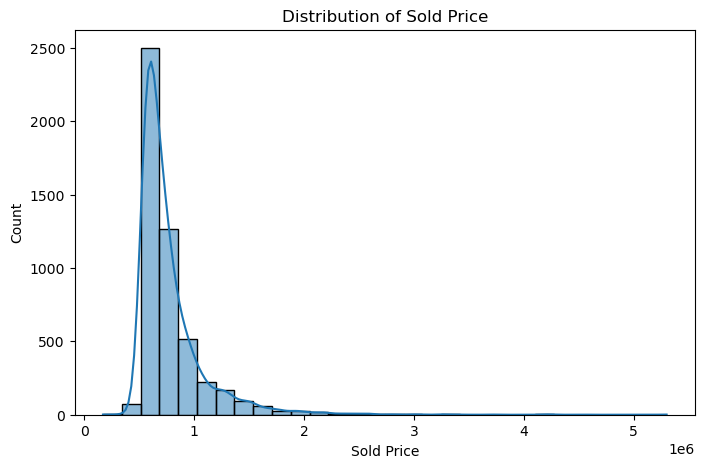

In [24]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Sold Price')
plt.xlabel('Sold Price')
plt.ylabel('Count')
sns.histplot(df['sold_price'],bins=30,kde=True)
plt.show()

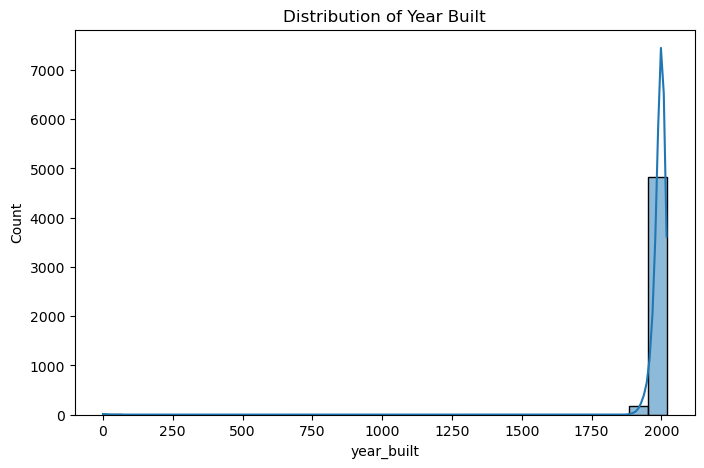

In [25]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Year Built')
plt.xlabel('year_built')
plt.ylabel('Count')
sns.histplot(df['year_built'],bins=30,kde=True)
plt.show()

# Distribution Plot
Used for: Checking if the data follows a normal distribution.
Similar to a histogram but focuses more on smooth curves.

Text(0, 0.5, 'Density')

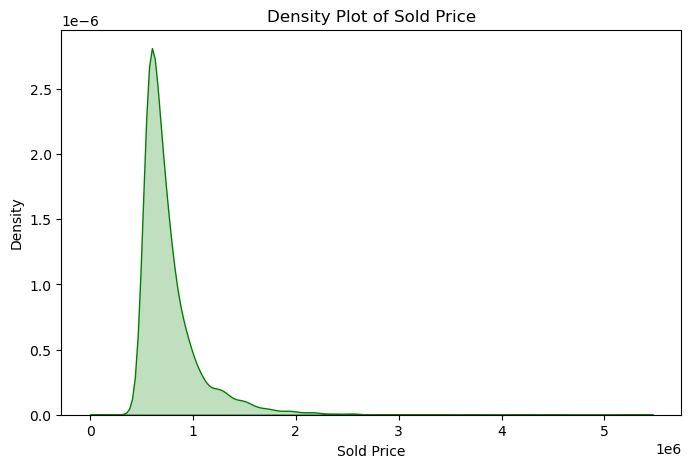

In [26]:
plt.figure(figsize=(8,5))
#sns.kdeplot(df['sold_price'], shade= True, color= 'green')
sns.kdeplot(df['sold_price'], fill= True, color= 'green')
plt.title('Density Plot of Sold Price')
plt.xlabel('Sold Price')
plt.ylabel('Density')

# Pairplot
Used for: Checking relationships between multiple numerical variables.
It creates scatter plots + histograms for every combination.

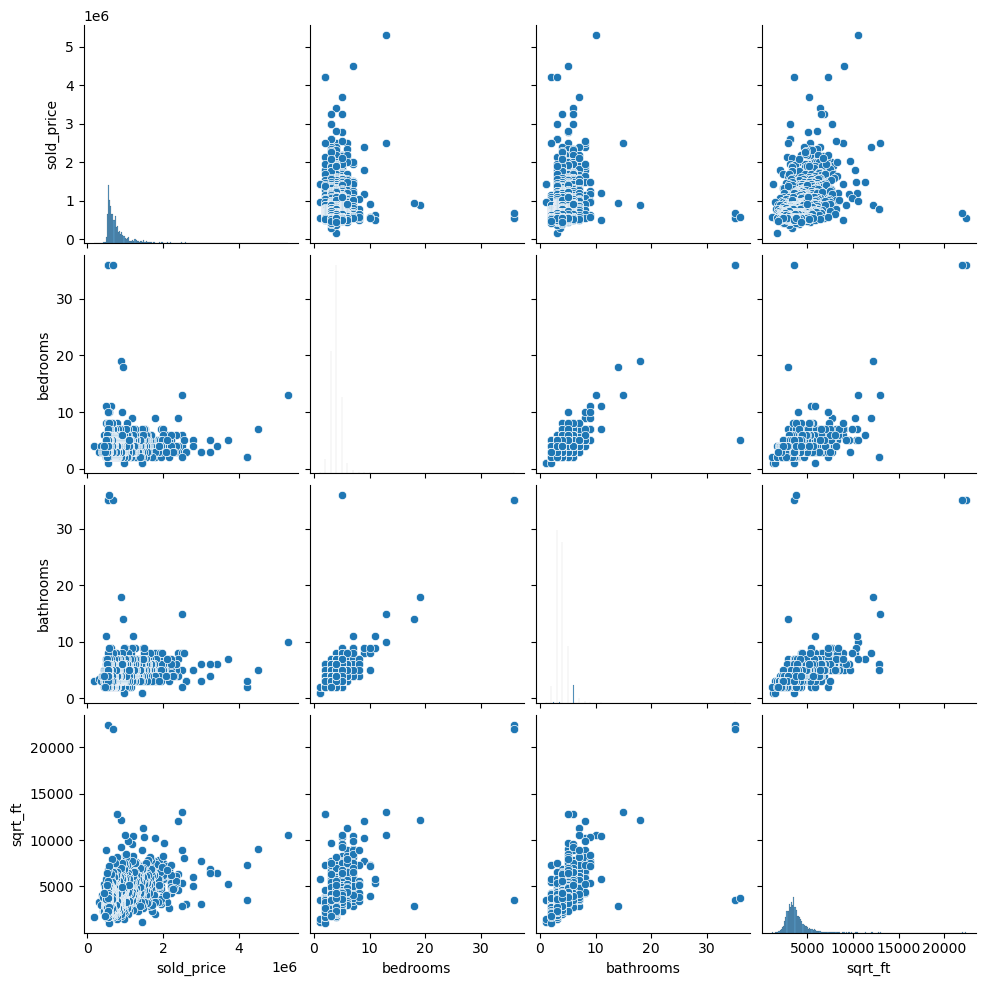

In [27]:
sns.pairplot(df[['sold_price','bedrooms','bathrooms','sqrt_ft']])
plt.show()

# Box and Whisker Plot (Boxplot)
Used for: Identifying outliers in numerical data.
Shows median, quartiles, and extreme values.

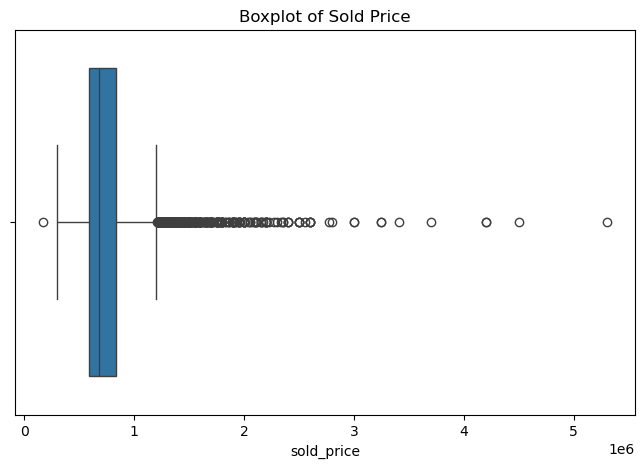

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sold_price'])
plt.title("Boxplot of Sold Price")
plt.show()


# Outlier Detection with Boxplot
Used for: Identifying extreme values in specific columns.

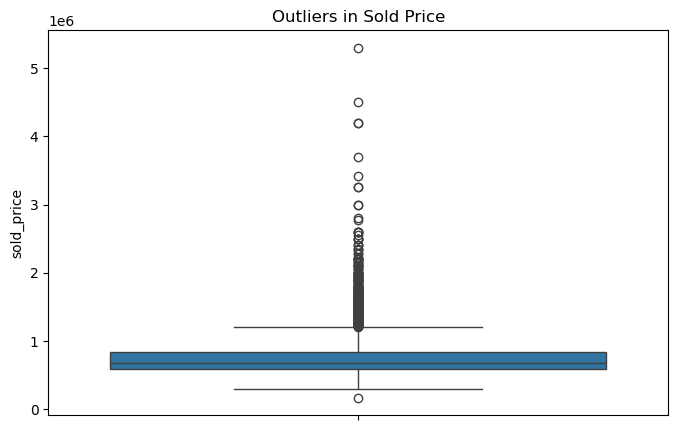

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['sold_price'])
plt.title("Outliers in Sold Price")
plt.show()


# Compute correlation matrix

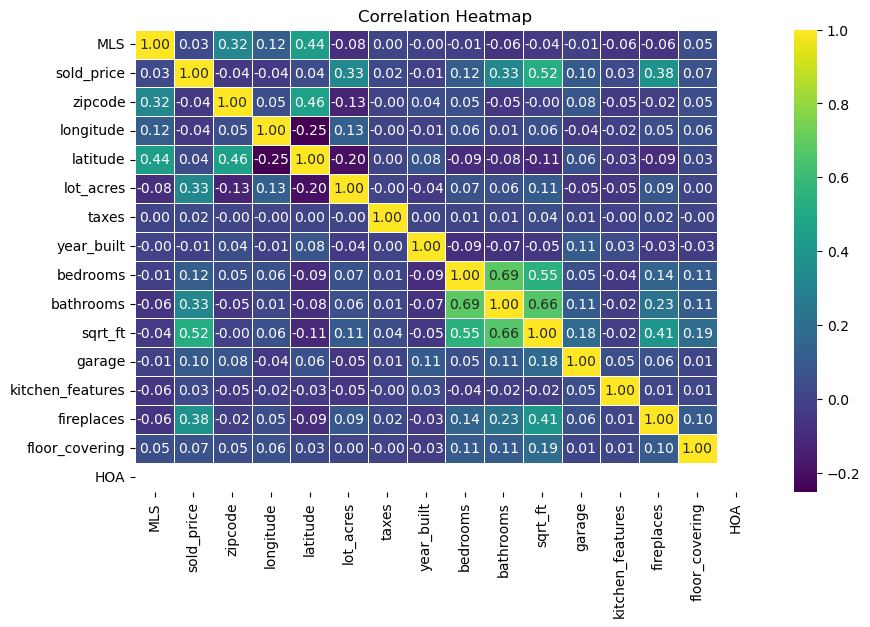

In [30]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<Figure size 2500x2500 with 0 Axes>

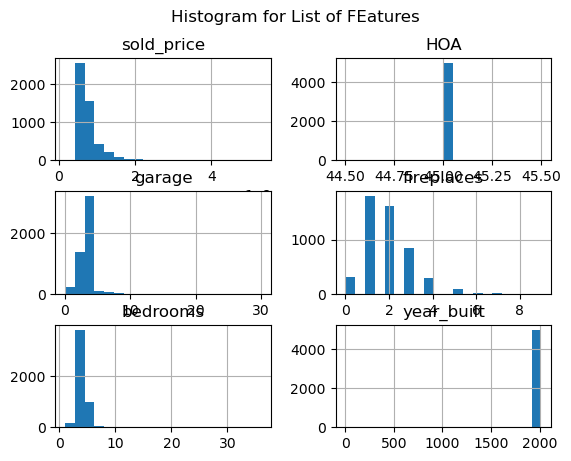

In [31]:
listoffeatures = ['sold_price','HOA', 'garage', 'fireplaces','bedrooms','year_built']
plt.figure(figsize=(25, 25))
df[listoffeatures].hist(bins=20,)
plt.suptitle('Histogram for List of FEatures')
plt.show()

In [32]:
df.to_csv("cleaned_data.csv", index=False)

In [33]:
!jupyter nbconvert --to html /content/Raw_House_Data.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern '/content/Raw_House_Data.ipynb' matched no files


In [35]:
jupyter nbconvert --to pdf Raw_House_Data.ipynb


SyntaxError: invalid syntax (132212448.py, line 1)